In [222]:
#!/usr/bin/env python
import sys
import os

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

import pandas as pd
import seaborn as sns
import numpy as np
import functools

In [3]:
def get_results(piv, metric, result):
    piv_m = piv.fillna(0).mean().to_frame().reset_index()
    piv_m.columns = ['run', metric]
    if result.empty:
        result = piv_m
    else:
        result = pd.merge(result, piv_m, on=['run'])
    return result

In [4]:
def save_plot(corr, prefix):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(20,15))
    sns.set(font_scale=1.5)
    sns_plot = sns.heatmap(corr,
            mask=mask,
            square=True, linewidths=.5,
            annot=True, fmt='.2g', annot_kws={"size": 20})
    sns_plot.tick_params(labelsize=25)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('correlation/' + prefix + '_kendall.png')
    plt.close()

In [190]:
def get_corr(filename, dataslice):
    df = pd.read_csv(filename, sep='\t', lineterminator='\n')

    soa_metrics = ['sDCGs' , 'EUs' , 'CTs', 'nsDCGs' , 'nEUs' , 'nCTs']
    metrics = []
    for m in list(df):
        if 'MsM' not in m: continue
        metrics.append(m)
    
    years = [2015, 2016, 2017]
 
    all_corr = pd.DataFrame()
    
    for y in pd.unique(df[dataslice]):
        df_y = df[df[dataslice]==int(y)]
        for soa_metric in soa_metrics:
            for metric in metrics:
                result = pd.DataFrame()
                piv = df_t.pivot(index='topic', columns='run', values=soa_metric)
                result = get_results(piv, soa_metric, result)
                piv = df_t.pivot(index='topic', columns='run', values=metric)
                result = get_results(piv, metric, result)
                corr = result.corr(method='kendall')

                if soa_metric in all_corr.columns and metric in all_corr.index and not all_corr.isnull().values.any():
                    all_corr.at[metric,soa_metric] = all_corr.at[metric,soa_metric] + corr[metric][soa_metric]
                else:
                    all_corr.at[metric,soa_metric] = corr[metric][soa_metric]
                
    corr = np.divide(all_corr, len(pd.unique(df[dataslice])))
    return(corr)

In [228]:
def get_grid(corr, soa_metric):
    c = defaultdict(dict)
    x = []
    y = []
    for m in list(df):
        if 'MsM' not in m or 'log' not in m: continue
        tmp = m.split('_')
        x.append(float(m.split('_')[1]))
        y.append(float(m.split('_')[3]))
        c[m.split('_')[1]][m.split('_')[3]] = corr_year[soa_metric][m]
    
    Z = np.full((19,19), np.nan)
    k = 0
    l = 0
    for n,m in sorted(zip(x,y)):
        nn = ('%.2f' % n)
        mm = ('%.2f' % m)
        Z[k,l] = c[nn][mm]
        if n + m >= 0.94:
            k = k + 1
            l = 0
        else:
            l = l + 1
    xx = np.arange(0.05, 1, 0.05)
    yy = np.arange(0.05, 1, 0.05)
    X, Y = np.meshgrid(xx, yy)
    return(X,Y,Z)

In [232]:
def plot_corr(soa_metric):
    plt.rcParams['font.size'] = 40
    ax = plt.subplots(figsize=(20,15))
    contour=plt.contourf(X, Y, Z, 40, cmap=plt.cm.Reds)
    plt.colorbar()
    plt.xlabel('Forward Probability', {'fontsize': 40})
    plt.ylabel('Reformulation Probability', {'fontsize': 40})
    plt.title(soa_metric, {'fontsize': 40})

/Users/ekanou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


MsM_0.05_0.0_0.90_0.05_log    0.901478
MsM_0.10_0.0_0.85_0.05_lin    0.901478
MsM_0.05_0.0_0.90_0.05_lin    0.901478
MsM_0.20_0.0_0.75_0.05_lin    0.891626
MsM_0.15_0.0_0.80_0.05_lin    0.891626
MsM_0.20_0.0_0.75_0.05_log    0.881773
MsM_0.25_0.0_0.70_0.05_log    0.881773
MsM_0.05_0.0_0.85_0.10_log    0.881773
MsM_0.05_0.0_0.85_0.10_lin    0.881773
MsM_0.50_0.0_0.45_0.05_log    0.881773
MsM_0.10_0.0_0.85_0.05_log    0.881773
MsM_0.15_0.0_0.75_0.10_log    0.881773
MsM_0.25_0.0_0.70_0.05_lin    0.881773
MsM_0.35_0.0_0.60_0.05_log    0.881773
MsM_0.30_0.0_0.65_0.05_log    0.881773
MsM_0.15_0.0_0.80_0.05_log    0.881773
MsM_0.10_0.0_0.80_0.10_log    0.881773
MsM_0.45_0.0_0.50_0.05_log    0.871921
MsM_0.10_0.0_0.80_0.10_lin    0.871921
MsM_0.15_0.0_0.75_0.10_lin    0.871921
MsM_0.35_0.0_0.60_0.05_lin    0.871921
MsM_0.25_0.0_0.65_0.10_log    0.871921
MsM_0.30_0.0_0.60_0.10_log    0.871921
MsM_0.05_0.0_0.80_0.15_log    0.871921
MsM_0.30_0.0_0.65_0.05_lin    0.871921
MsM_0.40_0.0_0.55_0.05_lo

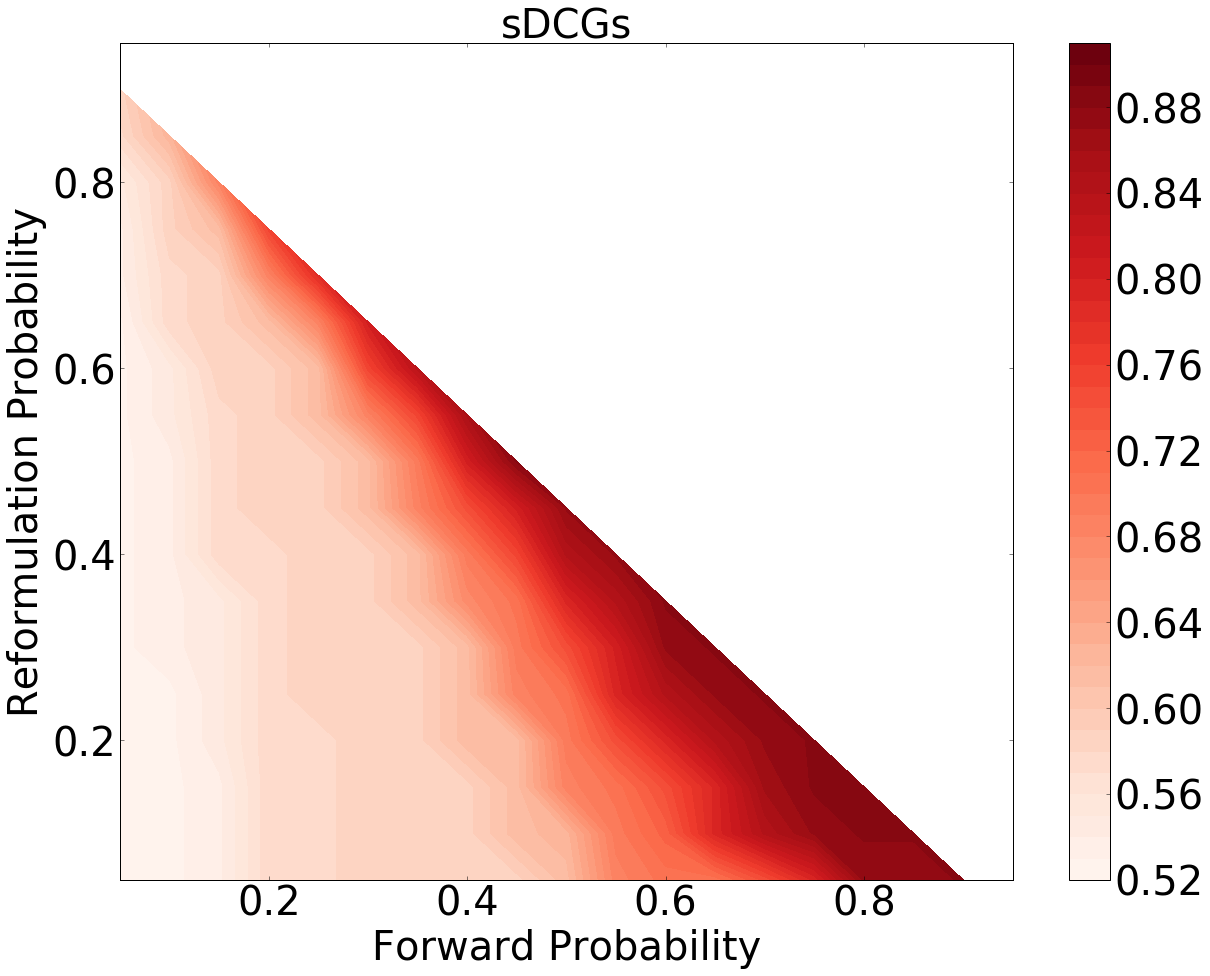

In [234]:
corr_year = get_corr('dd_all.eval', 'year')

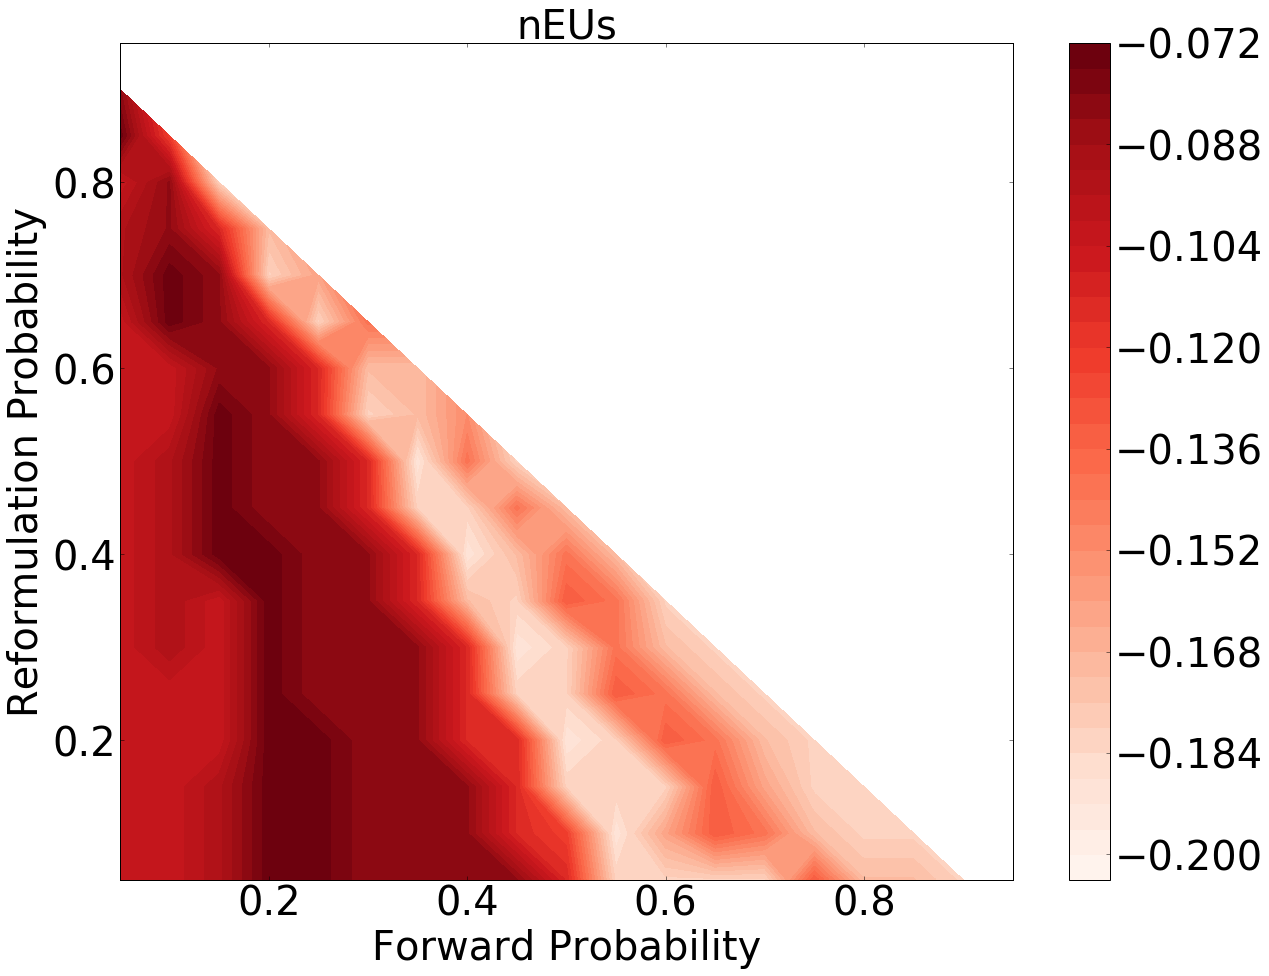

In [240]:
#print(corr_year.sort('sDCGs', ascending=False)['sDCGs'])
[X,Y,Z] = get_grid(corr_year,'nEUs')
#np.nanmax(Z[1,:])
plot_corr('nEUs')

/Users/ekanou/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


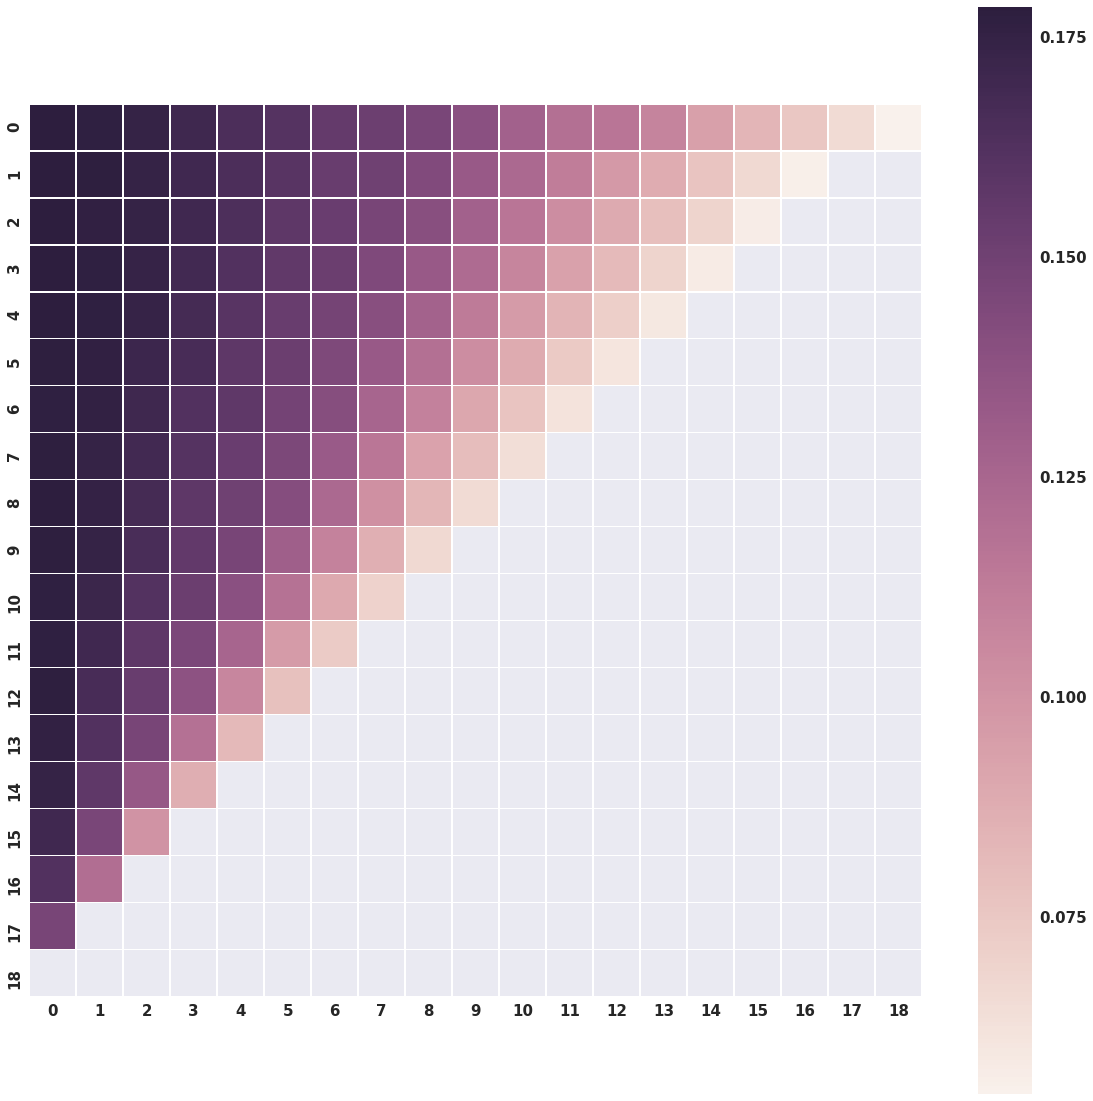

In [137]:
plt.subplots(figsize=(20,20))
sns.set(font_scale=1.5)
sns_plot = sns.heatmap(Z,
        square=True, linewidths=.5,
        annot=False, fmt='.2g', annot_kws={"size": 20})